### El concepto de derivada

La derivada de una función $f$ en el punto $x$ es dada por 

$$
f'(x) =\lim_{\Delta x \rightarrow 0} \frac{f(x + \Delta x)-f(x)}{\Delta x}
$$

Siempre y cuando el límite exista. Todos los puntos $x$ para los cuales este el límite existe definen una función $f'$ de $x$.  

#### Estudio de la noción de límite

Encuentre el límite de la función $f(x) = x^2 - x + 2$ cuando $x$ tiende a $2$.

Primero que todo se puede evaluar el comportamiento de la función mediante una gráfica de la misma. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3,5,num = 40)

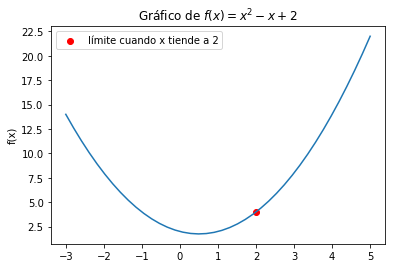

In [5]:
plt.plot(x, x**2 - x +2)
plt.scatter(2, 4, label="límite cuando x tiende a 2", color='r')
plt.legend()
plt.title(r"Gráfico de $f(x)= x^2-x+2$")
plt.ylabel('f(x)')
plt.show()

De acuerdo con el gráfico y con la tabla de valores se observa que a medida que $x$ se acerca a $2$ la función $f(x)$ se aproxima a $4$.

In [8]:
import pandas as pd
x = np.array([1.90, 1.95, 1.99, 2.01, 2.05, 2.1])
y = x**2 - x +2
tabla_valores = pd.DataFrame(list(zip(x,y)), columns = ['x', 'f(x)'])
tabla_valores

,x,f(x)
0,1.90,3.7100
1,1.95,3.8525
2,1.99,3.9701
3,2.01,4.0301
4,2.05,4.1525
5,2.10,4.3100


Para comprobar nuestra intuición vamos a calcular el valor del límite usando la librería de python llamada SymPy https://www.sympy.org

La sintaxis de la función para calcular el límite es la siguiente

                                    Limit(funcion, variable, punto)


In [11]:
from sympy.interactive import printing 

In [12]:
from sympy import Limit, limit, Symbol, S

In [13]:
# impresion con notacion matematica
printing.init_printing(use_latex = 'mathjax')

In [14]:
#se crea la variable 
x = Symbol('x') 

In [15]:
# se crea el objeto Limit
Limit(x**2 - x + 2, x, 2)

     ⎛ 2        ⎞
 lim ⎝x  - x + 2⎠
x─→2⁺            

In [17]:
Limit(x**2 - x + 2, x, 2).doit()

4

# Tarea 

Determine el límite cuando $x$ tiende a $-1$ de la función $f(x)= x - x^3 $ usando la función " limit "

# Ejercicio de clase

1. Punto teórico: Use las reglas para el cálculo de las derivadas para describir los comportamientos de la siguiente función: determine los intervalos de crecimiento, los puntos extremos, los cambios de concavidad y grafique la función.

2. Punto en python: Encuentre el valor de la derivada de la función $f(x)= \frac{3x}{(x^2-1)}$ en el punto $x = 10$.

3. Graficar la función en python.

#### Límites cuando x tiende a infinito 

In [21]:
Limit(1/x, x, S.Infinity)

    1
lim ─
x─→∞x

In [22]:
Limit(1/x, x, S.Infinity).doit()

0

#### Hasta el momento hemos calculado derivadas con la definición usando la librería para el cálculo de límites. Vamos ahora a usar una librería para calculo direco de las derivadas de una funicón.

En este caso el objeto principal es " Derivative " cuya sintaxis es

                            Derivative(funcion, variable, orden de derivacion) 

Ejemplo: Calcular la derivada de la función $f(x)=\frac{3x}{(x^2-1)}$

In [24]:
from sympy import Derivative, diff, simplify

fx = (3*x)/(x**2 - 1)
dx = Derivative(fx, x).doit() #la funcion diff da el resultado directo. diff(fx,x)
dx

        2           
     6⋅x        3   
- ───────── + ──────
          2    2    
  ⎛ 2    ⎞    x  - 1
  ⎝x  - 1⎠          

In [26]:
# si se quiere simplificar
simplify(dx)

  ⎛   2    ⎞ 
 -⎝3⋅x  + 3⎠ 
─────────────
 4      2    
x  - 2⋅x  + 1

In [27]:
# si se desea calcular la derivada de orden superior se debe indicar el tercer argumento de Derivative
d3x = Derivative(fx, x,3).doit()
d3x

   ⎛        4         2     ⎞
   ⎜     8⋅x       8⋅x      ⎟
18⋅⎜- ───────── + ────── - 1⎟
   ⎜          2    2        ⎟
   ⎜  ⎛ 2    ⎞    x  - 1    ⎟
   ⎝  ⎝x  - 1⎠              ⎠
─────────────────────────────
                  2          
          ⎛ 2    ⎞           
          ⎝x  - 1⎠           

Esta misma derivada de orden tres se puede calcular de la siguiente manera:

In [31]:
simplify(diff(fx, x,3))

   ⎛    4        2     ⎞   
  -⎝18⋅x  + 108⋅x  + 18⎠   
───────────────────────────
 8      6      4      2    
x  - 4⋅x  + 6⋅x  - 4⋅x  + 1

# Por último 

Con el método " subs " sustituimos el valor de $x$ para obtener el resultado numérico. Por ejemplo en el ejercicio de seguimiento se pedia calcular la derivada en el punto $x = 10$. La forma de hacerlo usando python es:

In [35]:
diff(fx, x).subs(x, 10)

-101 
─────
 3267